<a href="https://colab.research.google.com/github/MelisaManiosCuellar/Big-Data/blob/master/Taller_Diplomado_1Oct_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Conectarse al drive

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
# Establecer ruta de acceso en drive
import os
print(os.getcwd())
os.chdir("/content/gdrive/My Drive")

Mounted at /content/gdrive
/content


In [ ]:
%cd '/content/gdrive/MyDrive/Taller_Diplomado_1Oct'

/content/gdrive/MyDrive/Taller_Diplomado_1Oct


## 1.1 Cargar paquetes

In [ ]:
import pandas as pd
from   scipy import stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from prettytable import PrettyTable
from sklearn.metrics import accuracy_score, recall_score
from sklearn import metrics


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# 2. Cargar los datos (Regresion)

In [ ]:
data_boston= pd.read_csv('Boston.csv',sep=',')
data_boston= data_boston.drop(columns=['Unnamed: 0'])
data_boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
data_boston.shape

(506, 14)

**Notacion**

**CRIM** - per capita crime rate by town

**ZN** - proportion of residential land zoned for lots over 25,000 sq.ft.

**INDUS** - proportion of non-retail business acres per town.

**CHAS** - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

**NOX** - nitric oxides concentration (parts per 10 million)

**RM** - average number of rooms per dwelling

**AGE** - proportion of owner-occupied units built prior to 1940

**DIS** - weighted distances to five Boston employment centres

**RAD** - index of accessibility to radial highways

**TAX** - full-value property-tax rate per $10,000

**PTRATIO** - pupil-teacher ratio by town

**B** - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

**LSTAT** - % lower status of the population

**MEDV** - Median value of owner-occupied homes in $1000's

# Grafico general (Analisis descriptivo)

Text(0.5, 1.0, 'Relacion medv vs lstat')

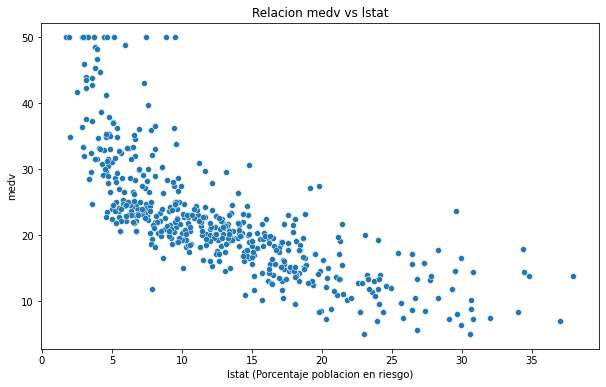

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.scatterplot(x=data_boston.lstat,y=data_boston.medv)
plt.xlabel('lstat (Porcentaje poblacion en riesgo)')
plt.ylabel('medv')
plt.title('Relacion medv vs lstat')

**Interpretacion** .................. Yo pienso ....

Text(0.5, 1.0, 'Relacion medv vs cercania a rios')

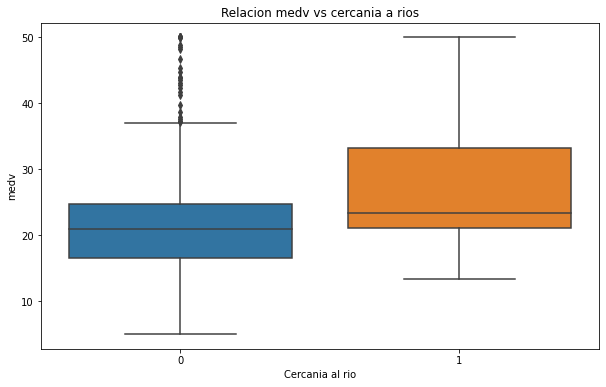

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.boxplot(x=data_boston.chas,y=data_boston.medv)
plt.xlabel('Cercania al rio')
plt.ylabel('medv')
plt.title('Relacion medv vs cercania a rios')

**Interpretacion**.........

In [ ]:
data_boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# 3. Definir la matriz de diseño (X) y el vector respuesta (y)

In [ ]:
X=data_boston.drop(columns=['medv']) # Variables independientes
y=data_boston['medv'] # Variable medv

# 4. Definir muestra de entrenamiento y test

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)

# 5. Entrenar modelo (prepararse para el partido)

In [ ]:
regressor = LinearRegression() # Regresion
regressor.fit(X_train, y_train) # Ajustar el modelo a los datos

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 6. Analizar coeficientes

In [ ]:
#Recuperamos la intersección
print(regressor.intercept_)

29.83642016383861


In [ ]:
# Coeficientes de regresion (pendientes)
print(regressor.coef_)

[-1.28322638e-01  2.95517751e-02  4.88590934e-02  2.77350326e+00
 -1.62388292e+01  4.36875476e+00 -9.24808158e-03 -1.40086668e+00
  2.57761243e-01 -9.95694820e-03 -9.23122944e-01  1.31854199e-02
 -5.17639519e-01]


In [ ]:
data_boston_x= data_boston.drop(columns=['medv'])
data_boston_x.columns
df=pd.DataFrame(regressor.coef_, data_boston_x.columns, columns=['Coeficientes'])
df

,Coeficientes
crim,-0.128323
zn,0.029552
indus,0.048859
chas,2.773503
nox,-16.238829
rm,4.368755
age,-0.009248
dis,-1.400867
rad,0.257761
tax,-0.009957


**rm** por cada unidad que aumente rm el valor de medv incrementa en 4.36 (4360 $) unidades 

**nox** por cada unidad que aumente nox el valor de medv disminuye en 16.23 unidades


# 7. Validar los resultados

In [ ]:
y_pred= regressor.predict(X_test)

In [ ]:
y_test

173    23.6
274    32.4
491    13.6
72     22.8
452    16.1
       ... 
418     8.8
117    19.2
42     25.3
322    20.4
347    23.1
Name: medv, Length: 127, dtype: float64

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)# El modelo captura el 70% de la variabilidad

0.6844267283527106

$\color{red}{\text{Tarea parte 1: Regresion}}$

**Hacer esto mismo con Wine.csv (y= proline, x=todas las demas)**

1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10)Color intensity

11)Hue

12)OD280/OD315 of diluted wines

13)Proline

In [ ]:
data_wine= pd.read_csv('wine.csv',sep=',')
data_wine.head()


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
data_wine.shape

(178, 14)

In [ ]:
attributes = data_wine.columns
features = attributes[1:]
classification = attributes[0]
print("The attributes in the dataframe are:\n", attributes)

The attributes in the dataframe are:
 Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD', 'Proline'],
      dtype='object')


In [ ]:
data_wine.describe()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


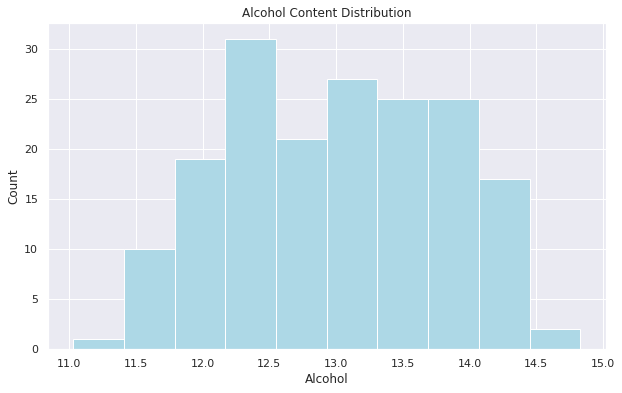

In [ ]:
hist_quality = data_wine['Alcohol']
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,6))
plt.hist(hist_quality, 10,facecolor="lightblue")
plt.xlabel('Alcohol')
plt.ylabel('Count')
plt.title('Alcohol Content Distribution')
plt.grid(True)
plt.show()


Text(0.5, 1.0, 'Wine')

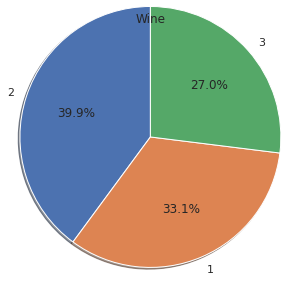

In [ ]:
area_counts = data_wine['Wine'].value_counts()
explode = (0, 0.1, 0)
area_counts.plot(kind='pie',startangle=90,autopct='%1.1f%%', shadow=True, figsize=(4,4), radius=1.5)
plt.title("Wine")

Text(0.5, 0.98, 'Relaciones entre la Prolina y Alcohol')

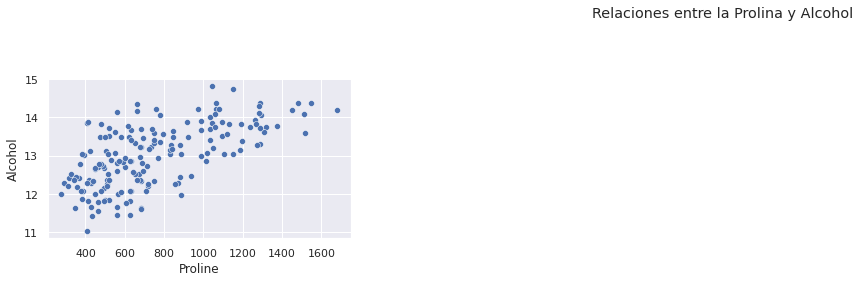

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(25,10))
plt.subplot(3,4,1)
sns.scatterplot(x=data_wine.Proline, y=data_wine.Alcohol)

plt.suptitle('Relaciones entre la Prolina y Alcohol')

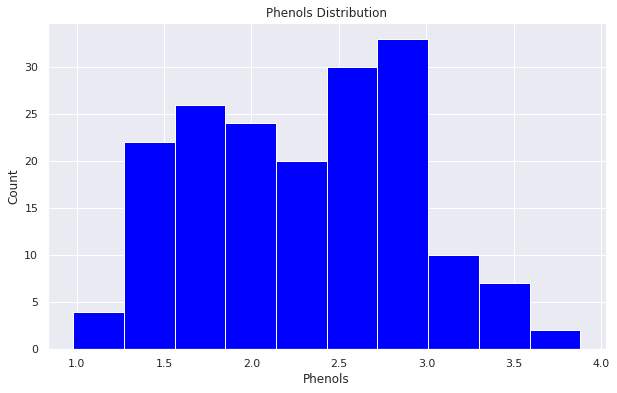

In [ ]:
hist_fixed = data_wine['Phenols']
sns.set_theme(style='darkgrid')
plt.figure(figsize=(10,6))
plt.hist(hist_fixed, 10,facecolor='blue')
plt.xlabel('Phenols')
plt.ylabel('Count')
plt.title('Phenols Distribution')
plt.grid(True)
plt.show()

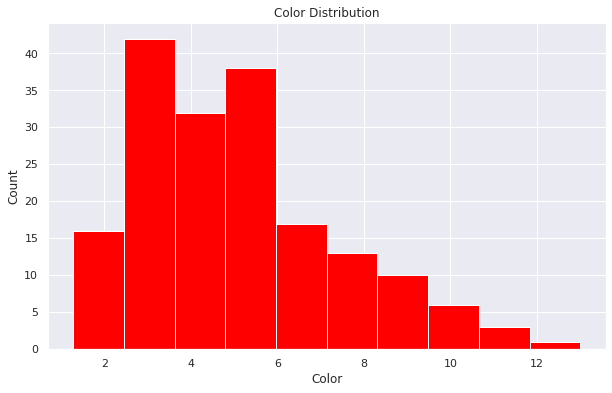

In [ ]:
hist_volatile =data_wine['Color.int']
plt.figure(figsize=(10,6))
plt.hist(hist_volatile, 10,facecolor='red')
plt.xlabel('Color')
plt.ylabel('Count')
plt.title('Color Distribution')
plt.grid(True)
plt.show()


# Definir la matriz de diseño (X) y el vector respuesta (y)

In [ ]:
X=data_wine.iloc[:,:-1].values # Tomar todas las columnas excepto la ultima
y= data_wine.iloc[:,-1].values # Tomar el vector respuesta (ultima columna)

In [ ]:
print(X.shape)
print(y.shape)

(178, 13)
(178,)


# Normalizamos los datos, usando Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
X_n= StandardScaler().fit_transform(X)
X_n

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.25171685,
         0.36217728,  1.84791957],
       [-1.21394365,  0.24628963, -0.49941338, ..., -0.29332133,
         0.40605066,  1.1134493 ],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.26901965,
         0.31830389,  0.78858745],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ...,  2.22423597,
        -1.61212515, -1.48544548],
       [ 1.37386437,  0.20923168,  0.22769377, ...,  1.83492299,
        -1.56825176, -1.40069891],
       [ 1.37386437,  1.39508604,  1.58316512, ...,  1.79166599,
        -1.52437837, -1.42894777]])

In [ ]:
y_1= np.transpose(np.array([y])) # Llevar a un vector vertical porque estaba como un vector horizontal
y_1.shape

(178, 1)

In [ ]:
y_n= StandardScaler().fit_transform(y_1) # Estandarizacion al vector y
y_n

array([[ 1.01300893],
       [ 0.96524152],
       [ 1.39514818],
       [ 2.33457383],
       [-0.03787401],
       [ 2.23903902],
       [ 1.72952002],
       [ 1.74544249],
       [ 0.94931905],
       [ 0.94931905],
       [ 2.43010864],
       [ 1.69767508],
       [ 1.82505483],
       [ 1.28369089],
       [ 2.54793491],
       [ 1.79320989],
       [ 1.69767508],
       [ 1.22000102],
       [ 2.97147258],
       [ 0.3124203 ],
       [ 0.10542821],
       [ 0.07358327],
       [ 0.91747411],
       [ 0.85378424],
       [ 0.3124203 ],
       [ 0.2646529 ],
       [ 1.42699311],
       [ 1.71359755],
       [ 0.53533487],
       [ 0.91747411],
       [ 1.71359755],
       [ 2.44603111],
       [ 0.7741719 ],
       [ 1.55437286],
       [ 1.10854374],
       [ 0.55125733],
       [ 0.42387759],
       [ 1.14038868],
       [ 0.86970671],
       [ 0.04173834],
       [ 0.15319562],
       [ 0.91747411],
       [ 1.10854374],
       [-0.21302116],
       [ 0.43980005],
       [ 1

# Separamos en entranamiento y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_n, y_n, test_size=0.25, random_state=42,shuffle=True)

# Entrenamos el modelo

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Analizamos los coeficientes

In [ ]:
#Recuperamos la intersección
print(regressor.intercept_)

[-0.00232517]


In [ ]:
print(regressor.coef_)

[[-0.75990723  0.15293898 -0.07397694  0.12222498 -0.08544996  0.08093001
   0.1573841  -0.42133872 -0.04912347  0.07940309  0.36741515  0.03440944
  -0.07374578]]


In [ ]:
regressor.coef_[0]

array([-0.75990723,  0.15293898, -0.07397694,  0.12222498, -0.08544996,
        0.08093001,  0.1573841 , -0.42133872, -0.04912347,  0.07940309,
        0.36741515,  0.03440944, -0.07374578])

In [ ]:
data_wine_x= data_wine.drop(columns=['Proline'])
data_wine_x.columns

Index(['Wine', 'Alcohol', 'Malic.acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid.phenols', 'Proanth', 'Color.int', 'Hue',
       'OD'],
      dtype='object')

# vectores de media y desviacion estandar

In [ ]:
np.mean(data_wine_x,axis=0)

Wine                     1.938202
Alcohol                 13.000618
Malic.acid               2.336348
Ash                      2.366517
Acl                     19.494944
Mg                      99.741573
Phenols                  2.295112
Flavanoids               2.029270
Nonflavanoid.phenols     0.361854
Proanth                  1.590899
Color.int                5.058090
Hue                      0.957449
OD                       2.611685
dtype: float64

In [ ]:
np.std(data_wine_x,axis=0)

Wine                     0.772855
Alcohol                  0.809543
Malic.acid               1.114004
Ash                      0.273572
Acl                      3.330170
Mg                      14.242308
Phenols                  0.624091
Flavanoids               0.996049
Nonflavanoid.phenols     0.124103
Proanth                  0.570749
Color.int                2.311765
Hue                      0.227929
OD                       0.707993
dtype: float64

In [ ]:
df=pd.DataFrame(regressor.coef_[0], data_wine_x.columns, columns=['Coeficiente'])
df['Medias']=np.mean(data_wine_x,axis=0)
df['Desviacion']=np.std(data_wine_x,axis=0)
df['Coef_final']=df.Medias + (df.Coeficiente*df.Desviacion) # Calculo del coeficiente sin normalizar
df

,Coeficiente,Medias,Desviacion,Coef_final
Wine,-0.759907,1.938202,0.772855,1.350904
Alcohol,0.152939,13.000618,0.809543,13.124429
Malic.acid,-0.073977,2.336348,1.114004,2.253938
Ash,0.122225,2.366517,0.273572,2.399954
Acl,-0.085450,19.494944,3.330170,19.210381
Mg,0.080930,99.741573,14.242308,100.894203
Phenols,0.157384,2.295112,0.624091,2.393334
Flavanoids,-0.421339,2.029270,0.996049,1.609596
Nonflavanoid.phenols,-0.049123,0.361854,0.124103,0.355758
Proanth,0.079403,1.590899,0.570749,1.636218


# Calculamos las predicciones

In [ ]:
y_prediccion = regressor.predict(X_test)
y_prediccion

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4740948075813741
Mean Squared Error: 0.34272344148046824
Root Mean Squared Error: 0.5854258633511746


In [ ]:
media_y= np.mean(data_wine.Proline)
desviacion_y= np.mean(data_wine.Proline)
desviacion_y

746.8932584269663

In [ ]:
data_n= pd.DataFrame(X_test, columns=data_wine_x.columns)
data_n['y_prediccion']=y_prediccion
data_n['y_prediccion_final']=(y_prediccion*desviacion_y)+media_y
data_n


,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,y_prediccion,y_prediccion_final
0,-1.213944,0.789806,0.685502,0.707247,-1.289707,1.141558,0.648764,1.004700,-1.545922,0.121071,0.018129,0.011190,1.056952,0.972716,1473.408311
1,-1.213944,1.493907,1.529305,0.268606,-0.178653,0.790492,0.889114,0.623193,-0.498407,-0.597284,0.078689,-0.383670,1.014578,0.942877,1451.121518
2,1.373864,-0.087232,0.425180,1.218995,0.451946,-0.262708,-1.209940,-1.535336,1.354888,-1.473326,-0.198156,-0.822404,-0.426113,-0.798770,150.297579
3,-1.213944,0.900980,-0.750759,1.218995,0.902373,0.088358,1.129464,1.225573,-0.578985,1.382572,0.277671,1.020278,0.138864,1.119016,1582.678492
4,0.079960,-0.778980,-1.046988,-1.632171,0.031547,-1.526548,-0.296611,-0.029386,-0.740141,-0.965221,-0.163550,0.713164,1.226445,-0.631083,275.541857
5,-1.213944,1.605081,-0.373741,1.292101,0.151661,1.422412,0.808997,1.115136,-0.256673,0.664217,0.493956,0.493797,0.054117,1.370681,1770.645338
6,0.079960,-1.236028,0.981731,-1.339744,-0.148624,-0.894628,-0.472868,-0.390814,0.065639,0.489009,-1.634288,-0.120430,0.619094,-1.072617,-54.237045
7,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,-0.310650,514.871156
8,0.079960,-1.717782,-0.885409,1.218995,0.151661,-0.403135,0.712858,0.894264,-0.578985,1.575301,-1.041667,0.011190,0.915707,-0.717836,210.746401
9,1.373864,0.443932,0.200764,-0.060375,0.151661,-0.754202,-1.434267,-1.535336,0.065639,-1.666055,0.234414,-1.129518,-0.200123,-0.726998,203.903684


# Clasificacion (diabetes)
## 1. Cargar los datos

In [ ]:
data_diabetes= pd.read_excel('diabetes_excel.xlsx')
data_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data_diabetes.shape

(768, 9)

**Pregnancies**: Number of times pregnant

**Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**BloodPressure**: Diastolic blood pressure (mm Hg)

**SkinThickness**: Triceps skin fold thickness (mm)

**Insulin**: 2-Hour serum insulin (mu U/ml)

**BMI**: Body mass index (weight in kg/(height in m)^2)

**DiabetesPedigreeFunction**: Diabetes pedigree function

**Age**: Age (years)

**Outcome**: 1 as diabites detected & 0 as not detected


# 2. Graficos descriptivos 

Text(0.5, 1.0, 'Edad vs Diagnostico Diabetes')

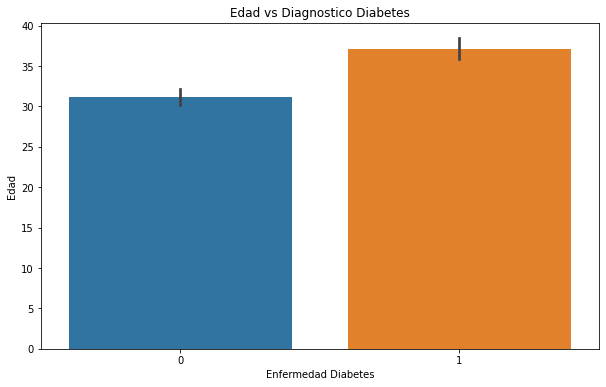

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.barplot(x=data_diabetes.Outcome, y=data_diabetes.Age)
plt.xlabel('Enfermedad Diabetes')
plt.ylabel('Edad')
plt.title('Edad vs Diagnostico Diabetes')

**Intepretacion** 

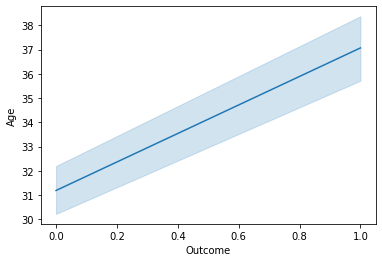

In [ ]:
sns.lineplot(x=data_diabetes.Outcome, y=data_diabetes.Age)

Text(0.5, 0.98, 'Relaciones entre presentar diabetes vs variables fisiologicas')

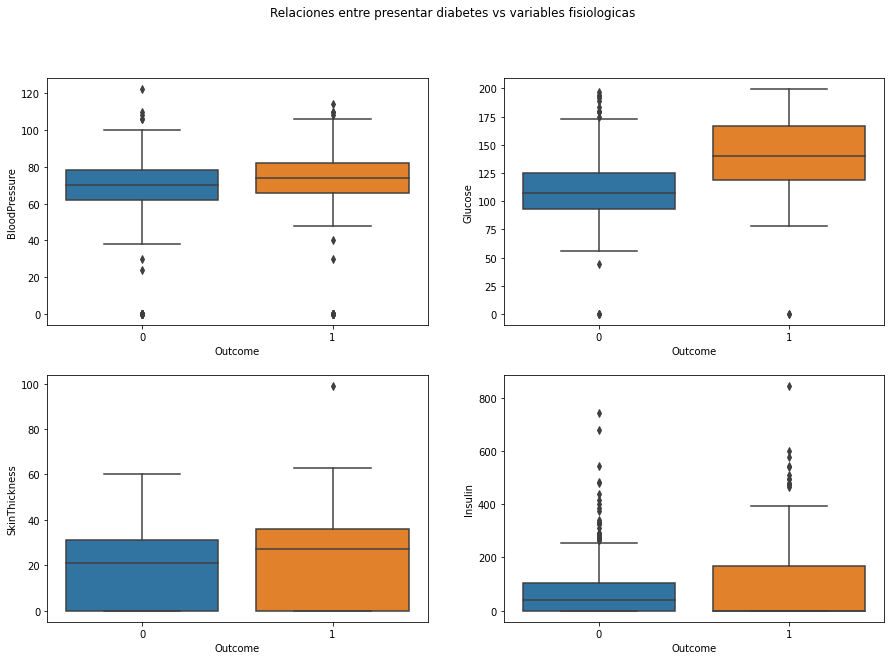

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.boxplot(x=data_diabetes.Outcome, y=data_diabetes.BloodPressure)
plt.subplot(2,2,2)
sns.boxplot(x=data_diabetes.Outcome, y=data_diabetes.Glucose)
plt.subplot(2,2,3)
sns.boxplot(x=data_diabetes.Outcome, y=data_diabetes.SkinThickness)
plt.subplot(2,2,4)
sns.boxplot(x=data_diabetes.Outcome, y=data_diabetes.Insulin)
plt.suptitle('Relaciones entre presentar diabetes vs variables fisiologicas')

Text(0.5, 0.98, 'Relaciones entre presentar diabetes vs variables fisiologicas')

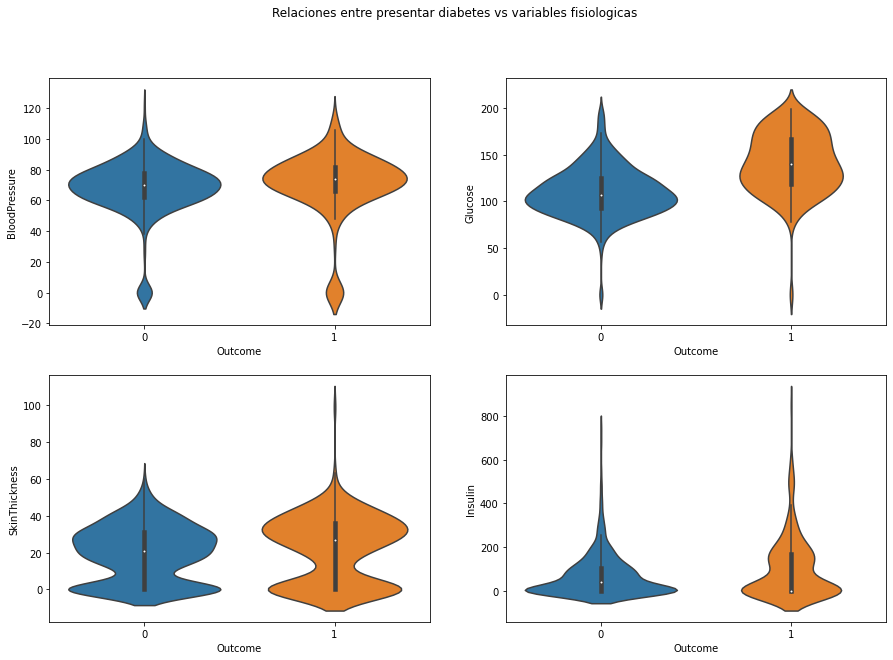

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x=data_diabetes.Outcome, y=data_diabetes.BloodPressure)
plt.subplot(2,2,2)
sns.violinplot(x=data_diabetes.Outcome, y=data_diabetes.Glucose)
plt.subplot(2,2,3)
sns.violinplot(x=data_diabetes.Outcome, y=data_diabetes.SkinThickness)
plt.subplot(2,2,4)
sns.violinplot(x=data_diabetes.Outcome, y=data_diabetes.Insulin)
plt.suptitle('Relaciones entre presentar diabetes vs variables fisiologicas')

# 3. Definir matriz de diseño X vector y

In [ ]:
X=data_diabetes.drop(columns=['Outcome'])
y= data_diabetes['Outcome']

# 4. Separar en train y test (prepararse para el partido)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)

# 5. Seleccionar y entrenar el algoritmo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=100,class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# 6. Hacer las predicciones

In [ ]:
y_pred= model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

In [ ]:
y_test

668    0
324    0
624    0
690    0
473    0
      ..
554    0
319    1
594    0
6      1
615    0
Name: Outcome, Length: 192, dtype: int64

# 7. Validacion del modelo

In [ ]:
from sklearn.metrics import classification_report
M=classification_report(y_test,y_pred)
print(M)

              precision    recall  f1-score   support

           0       0.80      0.81      0.81       123
           1       0.66      0.64      0.65        69

    accuracy                           0.75       192
   macro avg       0.73      0.73      0.73       192
weighted avg       0.75      0.75      0.75       192



$\color{purple}{\text{Tarea parte 2: Clasificacion, pueden elegir SVM, Regresion logistica, KNN, Arbol de Decision o Random Forest}}$

**Hacer esto mismo con Breast_cancer.csv (y= Diagnosis, x=)**

1) ID number

2) Diagnosis (M = malignant, B = benign) Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

In [ ]:
data_Breast_cancer= pd.read_csv('Breast_cancer.csv',sep=',')
data_Breast_cancer


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [ ]:
data_Breast_cancer. shape

(569, 33)

In [ ]:
attributes = data_Breast_cancer.columns
features = attributes[1:]
classification = attributes[0]
print("The attributes in the dataframe are:\n", attributes)

The attributes in the dataframe are:
 Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')


In [ ]:
data_Breast_cancer.isna().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
#Como hemos visto que tenemos 569 y encontramos que hay una columna (Sin nombre: 32) con 569 valores faltantes, we drop it
data_Breast_cancer.dropna(axis=1, inplace=True)

In [ ]:
# Para preparar los datos de los algoritmos de aprendizaje automático
data_Breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
#Diagnosis contiene M si el tumor es maligno y B si es benigno. Cambiamos estos valores de "objeto" por 1 si es maligno y 0 si es benigno
data_Breast_cancer['diagnosis'].replace(['M','B'],[1,0],inplace=True)

In [ ]:
data_Breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
#Observamos que los valores han cambiado
data_Breast_cancer.diagnosis

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

#  Graficos descriptivos

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


0    357
1    212
Name: diagnosis, dtype: int64

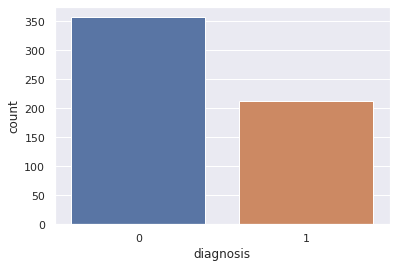

In [ ]:
# comencemos a visualizar la cantidad de tumores malignos y benignos en nuestro conjunto de datos
sns.countplot(data_Breast_cancer['diagnosis'])
data_Breast_cancer['diagnosis'].value_counts()

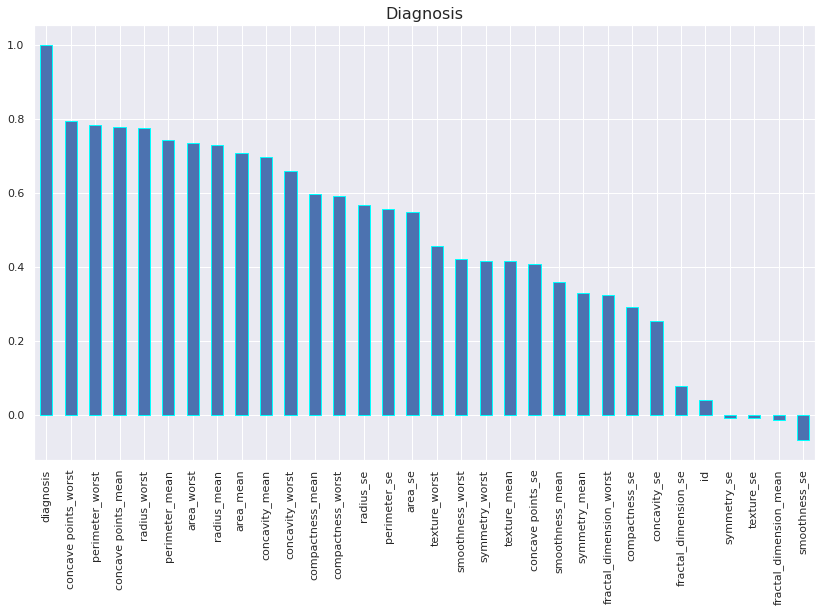

In [ ]:
#Plot correlaciones con la columna de diagnóstico
sns.set_theme(style='darkgrid')
plt.figure(figsize=(14,8))
plt.title("Diagnosis",fontsize=16)
corr = data_Breast_cancer.corr()['diagnosis'].sort_values(ascending=False)
corr.plot(kind='bar',edgecolor='cyan')

diagnosis               1.000000
concave points_worst    0.793566
perimeter_worst         0.782914
concave points_mean     0.776614
radius_worst            0.776454
perimeter_mean          0.742636
area_worst              0.733825
radius_mean             0.730029
area_mean               0.708984
concavity_mean          0.696360
concavity_worst         0.659610
Name: diagnosis, dtype: float64


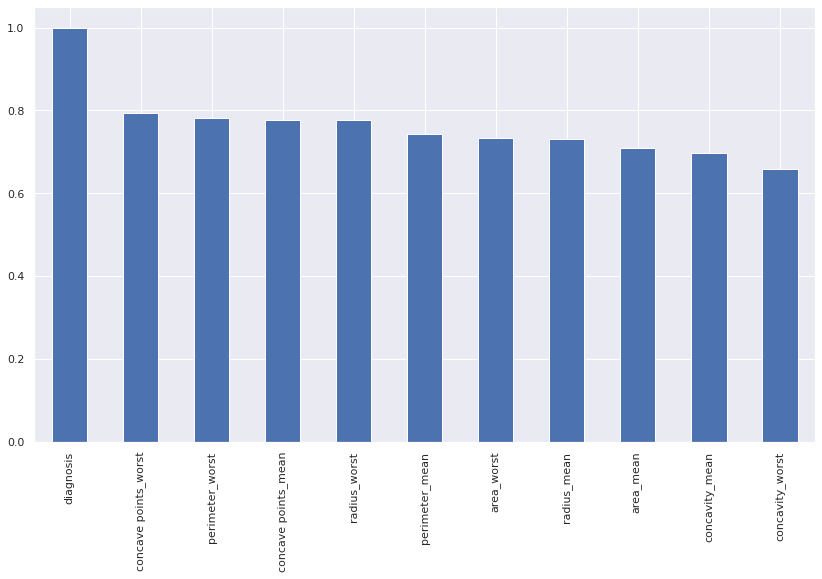

In [ ]:
# Trace solo correlaciones superiores a 0,6
plt.figure(figsize=(14,8))
corr[corr >= 0.6].plot(kind='bar')
print(corr[corr >= 0.6])

# 3. Definir matriz de diseño X vector y

In [ ]:
#Data separation
y = data_Breast_cancer.iloc[:,1]
x = data_Breast_cancer.loc[:,["concave points_worst", "perimeter_worst", "concave points_mean", "radius_worst", "perimeter_mean", "area_worst", "radius_mean", "area_mean" ,"concavity_mean", "concavity_worst"]]

# 4. Separar en train y test (prepararse para el partido

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

Eligieremos el 70% de los datos para entrenamiento, y el 30% para test, de igual manera se le aplicara el random_state para seleccionar la semilla y los datos sean aleatoreos

# 5. Seleccionar y entrenar el algoritmo

In [ ]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC(gamma="scale")
clf = GridSearchCV(svc, parameters, cv=5)
clf.fit(x_train, y_train)
print(clf.best_estimator_)


SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [ ]:
#Print some metrics in a table
from sklearn.metrics import f1_score, confusion_matrix
ptbl = PrettyTable()
ptbl.field_names = ["Accuracy", "Recall", "F1Score"]
ptbl.add_row([accuracy_score(y_test,clf.predict(x_test)),
          recall_score(y_test, clf.predict(x_test)), f1_score(y_test, clf.predict(x_test))])
print(ptbl)

+--------------------+--------------------+--------------------+
|      Accuracy      |       Recall       |      F1Score       |
+--------------------+--------------------+--------------------+
| 0.9707602339181286 | 0.9682539682539683 | 0.9606299212598425 |
+--------------------+--------------------+--------------------+


obtenemos un acuracy de 0.97, es decir, una probabilidad de el 97% de los datos que predice sean correctos, de cada 100 datos que se clasifiquen el 97 quedaran bien clasificados, lo cual nos indica que es un muy buen modelo

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=100,class_weight="balanced", max_features="log2")
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
ptbl = PrettyTable()
ptbl.field_names = ["Accuracy", "Recall", "F1Score"]
ptbl.add_row([accuracy_score(y_test,model.predict(x_test)),
           recall_score(y_test, model.predict(x_test)), f1_score(y_test, model.predict(x_test))])
print(ptbl)

+--------------------+--------------------+-------------------+
|      Accuracy      |       Recall       |      F1Score      |
+--------------------+--------------------+-------------------+
| 0.9590643274853801 | 0.9206349206349206 | 0.943089430894309 |
+--------------------+--------------------+-------------------+


# 6. Hacer las predicciones

In [ ]:
y_pred= model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int64

# 7. Validacion del modelo

In [ ]:
from sklearn.metrics import classification_report
M=classification_report(y_test,y_pred)
print(M)

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
test_accuracy = accuracy_score(y_test, y_pred)
print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9590643274853801


In [ ]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred)

0.9666666666666667

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[106,   2],
       [  5,  58]])

El modelo tuvo 106 verdaderos positivos, 2 falsos positivos, 58 verdaderos negativos y 5 falsos negativos, por lo que se puede concluir que el modelo funciona relativamente bien en cuanto a su clasificación.